<img src = "footballs.jpg">

## Footballs analysis

Here I am analyzing footballs, their prices, variety and diversity from online shop https://pigu.lt/.
Data of scrapping the information: 2020-10-05. Overall there are 123 balls presenting 15 brands: Adidas, Puma, Spokey, Get & Go, Select, Meteor, Molten, Nike, Umbro, Atom, Real Madrid, Messi, FC Barcelona, Hudora, Avento.

In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [2]:
data_path = pathlib.Path('Data\\footballs.csv')

In [3]:
types = {'id': 'int64',
         'price_2020_10_05': 'float32',
         'item_nbr': 'int32',
         'size_1': 'int8',
         'size_2': 'int8',
         'size_3': 'int8',
         'size_4': 'int8',
         'size_5': 'int8',
         'natural_grass': 'int8',
         'artifical_grass': 'int8',
         'futsal': 'int8'}

As for NaN values:

* Brand - 1
* size_1 - 3
* size_2 - 3
* size_3 - 3
* size_4 - 3
* size_5 - 3
* natural_grass - 70
* artifical_grass - 70
* futsal - 70
* major_material - 6

Unknown sizes wete taken as 0 for all sizes except sizes_5. 
As for pitch - I amrked 0 for all except natural_grass as it is more common pitch.
As material I added file major_material_NaN.txt.
One missed brand is 'Messi' brand, found model via Google.
All NaN's were changed directly in .csv file.

In [4]:
df_footballs = pd.read_csv(data_path, dtype=types)
print(df_footballs.shape)
df_footballs.isnull().sum()

(123, 17)


name                0
color               0
id                  0
price_2020_10_05    0
weight              0
package             0
brand               0
size_1              0
size_2              0
size_3              0
size_4              0
size_5              0
natural_grass       0
artifical_grass     0
futsal              0
major_material      0
comments            0
dtype: int64

In [5]:
df_footballs.head()

,name,color,id,price_2020_10_05,weight,package,brand,size_1,size_2,size_3,size_4,size_5,natural_grass,artifical_grass,futsal,major_material,comments
0,Puma Play,orange,31961037,11.950000,0.40,0.19x0.19x0.04,Puma,0,0,1,1,1,1,0,0,EVA,0
1,Puma Spin,orange,31961052,14.950000,0.42,0.2x0.2x0.04,Puma,0,0,1,1,1,1,1,1,TPU,0
2,Puma Spin,black,31961072,12.990000,0.40,0.2x0.2x0.04,Puma,0,0,0,1,1,1,1,1,TPU,0
3,Adidas Team J350,mix,28649595,27.950001,0.10,0.1x0.1x0.1,Adidas,0,0,0,1,0,1,0,0,TPU,0
4,Puma Future Flash Ball,mix,28439980,20.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,1,1,0,0,TPU,0


In [6]:
#df_footballs.major_material.value_counts()

In [7]:
df_footballs['brand'].value_counts().index

Index(['Adidas', 'Puma', 'Spokey', 'Get & Go', 'Select', 'Meteor', 'Molten',
       'Nike', 'Umbro', 'Atom', 'Real Madrid', 'Messi', 'FC Barcelona',
       'Hudora', 'Avento'],
      dtype='object')

In [8]:
brands_to_dict = df_footballs['brand'].value_counts().to_dict()

In [15]:
brandlist = []
for key, value in brands_to_dict.items():
    if value > 2:
        pass
    else:
        brandlist.append([key])
        
brandlist = list(chain(*brandlist))
print('Brands with less than 3 footballs available online:', brandlist)


Brands with less than 3 footballs available online: ['Real Madrid', 'Messi', 'FC Barcelona', 'Hudora', 'Avento']


In [10]:
df_brands = df_footballs.set_index('brand').drop(index=brandlist, axis=1)
df_brands.shape

(117, 16)

In [11]:
price_average = df_brands.groupby(['brand'])[['price_2020_10_05']].mean().sort_values(by='price_2020_10_05', ascending=False).round(decimals=2)
count = df_brands.groupby(['brand'])['id'].count().sort_values(ascending=False).to_dict()
price_average["count"] = pd.Series(count)
price_average

,price_2020_10_05,count
brand,,
Select,39.490002,5
Nike,24.980000,3
Molten,22.840000,4
Adidas,21.250000,53
Meteor,20.490000,5
Puma,18.250000,22
Umbro,14.280000,3
Spokey,10.290000,13
Atom,6.320000,3


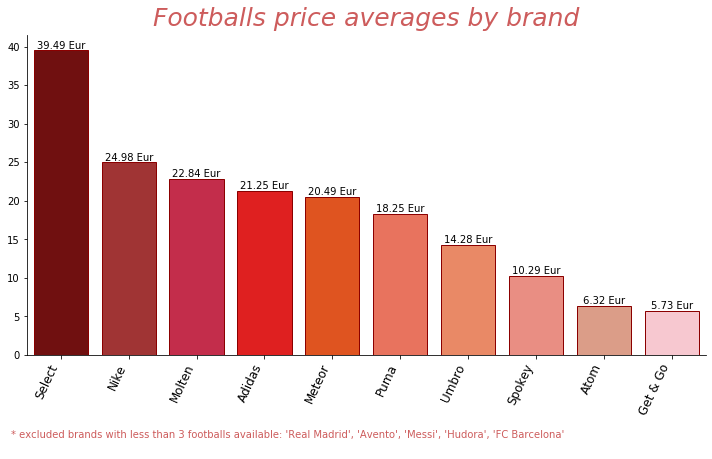

In [23]:
plt.figure(figsize=(10,6))
colors = ['maroon', 'firebrick','crimson','red', 'orangered', 'tomato', 'coral', 'salmon', 'darksalmon', 'pink']
sns.set_palette(sns.color_palette(colors))
price_average_plot = sns.barplot(x = price_average.index, y = price_average['price_2020_10_05'], edgecolor = 'darkred')
for item in price_average_plot.get_xticklabels():
    item.set_rotation(65)
plt.xticks(ha='right',fontweight='light',fontsize='large')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
for a in price_average_plot.patches: 
    price_average_plot.annotate('{:.2f}'.format(a.get_height()) + ' Eur', (a.get_x()+0.4, a.get_height()),
                            ha='center', va='bottom', color= 'black') 
plt.xlabel(None)    
plt.ylabel(None)
plt.title(f'Footballs price averages by brand', fontsize=25, fontstyle='italic', y=1.01, color='indianred')
plt.figtext(.02, -.05,("\n"*4) +  """* excluded brands with less than 3 footballs available: 'Real Madrid', 'Avento', 'Messi', 'Hudora', 'FC Barcelona'\n""",
            color='indianred', weight='light' ) 
plt.tight_layout()

***Insight:*** the leader is SELECT, but this brand represents only 5 balls. For comparison there are 53 Adidas balls and 22 Puma balls. On the other hand SELECT specializes in high quality balls for football and futsal and do not offer a big variety.
As for Nike, it presents only 3 balls here despite the fact that in the best footballs  worldwide  brand ratings this manufacturer is in the second place after the Adidas (credits: http://soccerballpicks.com/top-10-best-soccer-ball-brand/).

In [170]:
mask = pd.Series(df_footballs['name']).str.contains('15|16|17|18', regex=True)
print('Have 15/16/17/18 in their name:',df_footballs[mask].shape[1], 'times')
df_footballs[mask].tail(10)

Have 15/16/17/18 in their name: 17 times


,name,color,id,price_2020_10_05,weight,package,brand,size_1,size_2,size_3,size_4,size_5,natural_grass,artifical_grass,futsal,major_material,comments
92,Adidas EURO16 GLIDER,mix,28377860,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,PVC,0
95,Adidas EURO16OLP ESP C,mix,28440495,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
96,Adidas EURO16TRAINPRO,mix,28440500,28.990000,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
102,Adidas Finale18CB Cpt,mix,28377490,22.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,1,1,1,0,0,TPU,0
108,Get & Go 16SY,mix,28469530,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0
112,Adidas CONEXT15GLIDER,mix,28377775,17.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,TPU,0
113,Adidas EURO16 GLIDER,mix,28377820,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,PVC,0
114,Adidas EURO16PRAIA X,mix,28377855,19.950001,0.1,0.1x0.1x0.1,Adidas,0,0,0,0,1,1,0,0,Rubber,0
121,Get & Go 16SY,mix,28469525,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0
122,Get & Go 16SY,mix,28469535,5.490000,0.3,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0


Filter only Adidas, Select, Spokey as they only uses year in the model name.

In [76]:
mask_update = pd.Series(df_footballs[mask]['name']).str.lower().str.contains('adidas|select|spokey', regex=True)
old_models = mask_update.value_counts()[1]

In [199]:
dict_models = {'old_models': old_models,'rest': df_footballs.shape[0]-old_models}
df_models = pd.DataFrame.from_dict(dict_models,orient='index').rename(columns={0: "pcs"})
df_models

,pcs
old_models,22
rest,101


In [192]:
def plot_pie(df: pd.DataFrame,title: str):
    pie_plot = plt.pie(df, shadow=True, startangle=90, 
                   autopct='%1.2f%%', colors=['mistyrose','salmon'])
    plt.legend(labels=['target models', 'rest models'], loc=1)
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title, fontsize=15,)
    my_circle=plt.Circle( (0,0), 0.75, color='white')
    plt.gca().add_artist(my_circle)
    plt.show(block=False)

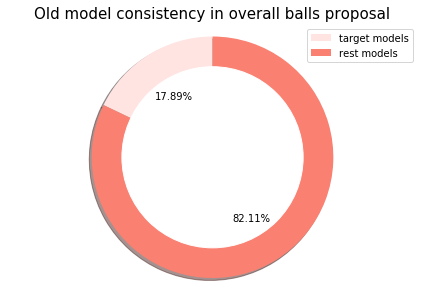

In [193]:
plot_pie(df_models['pcs'],'Old model consistency in overall balls proposal')

***Insight:*** Inferring that every 5th football in the online shop corresponds to past football tournament as contains 2016/2017/2018 in its name. It leads to rather confined and out of date proposition.

In [196]:
futsal = df_footballs[(df_footballs['futsal'] == 1) & 
             (df_footballs['natural_grass'] + df_footballs['artifical_grass'] + df_footballs['futsal'] == 1) & 
             (df_footballs['size_4'] == 1)]
count_futsal = futsal['id'].count()

In [200]:
dict_futsal = {'futsal_models': count_futsal,'rest': df_footballs.shape[0]-count_futsal}
df_futsal = pd.DataFrame.from_dict(dict_futsal,orient='index').rename(columns={0: "pcs"})
df_futsal

,pcs
futsal_models,8
rest,115


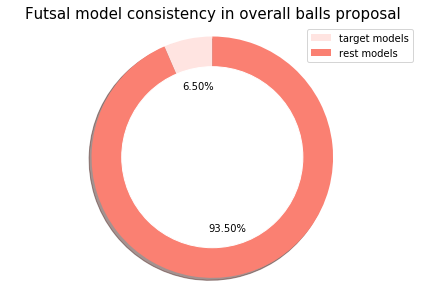

In [201]:
plot_pie(df_futsal['pcs'],'Futsal model consistency in overall balls proposal')

***Insight:*** Each 16 football from an online shop proposal is proper for playing futsal. The winter is coming, so a lot of semi-pro players will begin their training and competitions indoors. Also Lithuania will hold a World Futsal tournament in 2021, so the demand in the market could increase. So the demand for indoor football boots seems to rise also but it is out of scope of this analysis.

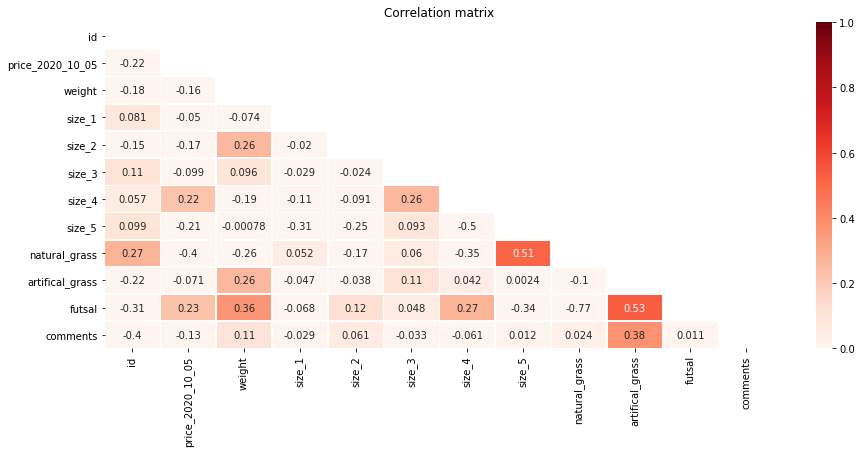

In [178]:
f, ax = plt.subplots(figsize=(15, 6))
mask_corr = np.triu(np.ones_like(df_footballs.corr(method='pearson'), dtype=bool))
sns.heatmap(df_footballs.corr(method='pearson'), annot=True, mask=mask_corr, robust=False,cmap='Reds', linewidths=.6, ax=ax, vmin=0, vmax=1)
plt.title('Correlation matrix', y=1.04)
plt.show()

***Insight:*** Correlation between variables shows their linear relationship. There is correlation between 'size_5' and 'natural_grass', as it is obviously the most common size to play on natural pitch. Also expected correlation between 'size_4' and 'futsal' as indoor football is mainly played with smaller than regular ball size. No need to pay much heed to the correlation between 'futsal' and 'artifical_grass', hard to figure out this interplay in reality. Derivable aspect from correlation matrix could be that futsal balls are heavier and more expensive (0.36 and 0.23 accordingly).

In [202]:
df_footballs

,name,color,id,price_2020_10_05,weight,package,brand,size_1,size_2,size_3,size_4,size_5,natural_grass,artifical_grass,futsal,major_material,comments
0,Puma Play,orange,31961037,11.950000,0.40,0.19x0.19x0.04,Puma,0,0,1,1,1,1,0,0,EVA,0
1,Puma Spin,orange,31961052,14.950000,0.42,0.2x0.2x0.04,Puma,0,0,1,1,1,1,1,1,TPU,0
2,Puma Spin,black,31961072,12.990000,0.40,0.2x0.2x0.04,Puma,0,0,0,1,1,1,1,1,TPU,0
3,Adidas Team J350,mix,28649595,27.950001,0.10,0.1x0.1x0.1,Adidas,0,0,0,1,0,1,0,0,TPU,0
4,Puma Future Flash Ball,mix,28439980,20.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,1,1,0,0,TPU,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Puma One Strap Ball,mix,28440235,20.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,1,1,0,0,TPU,0
119,Adidas Uefa Mini,mix,28440345,15.950000,0.10,0.1x0.1x0.1,Adidas,1,0,0,0,0,1,0,0,TPU,0
120,Puma Final 6 MS Trainer White Yellow,yellow,28443445,19.950001,0.10,0.1x0.1x0.1,Puma,0,0,0,1,0,1,0,0,TPU,0
121,Get & Go 16SY,mix,28469525,5.490000,0.30,0.21x0.21x0.1,Get & Go,0,0,0,0,1,1,0,0,PVC,0
